# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

os.getcwd()

'C:\\Users\\gianl'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

### Best Model 

# Predict  AdultWeekend price 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, explained_variance_score

In [5]:
data_ski_3= pd.read_csv('C:\\Users\\gianl\\data\\step3_output_V2_outliners_included.csv')
x = data_ski_3.drop(['Name','AdultWeekend', 'state', 'summit_elev'], axis =1)
y = data_ski_3['AdultWeekend']

In [6]:
print(data_ski_3.columns)
print(data_ski_3.shape)

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'clusters'],
      dtype='object')
(330, 26)


In [7]:
sca = StandardScaler()
sca.fit(x)
x_scaled = sca.transform(x)
y = y.ravel()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [9]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(x_train, y_train)
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = lm2.predict(x_test)
print('Mean abs error is', '{:.2f}'.format(mean_absolute_error(y_pred, y_test)))
print('Explained Variance is', '{:.2f}'.format(explained_variance_score(y_pred, y_test)))


Mean abs error is 5.12
Explained Variance is 0.93


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [11]:
#data_ski_2 =  pd.read_csv('C:\\Users\\gianl\\data\\step3_output_V2_outliners_included.csv')

Big_Mountain = data_ski_3[data_ski_3['Name'].str.contains('Big Mountain')]

Big_Mountain_x = Big_Mountain.drop(['Name','AdultWeekend', 'state', 'summit_elev'], axis =1)
Big_Mountain_y = Big_Mountain['AdultWeekend']

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [12]:
Big_Mountain_x_s = sca.transform(Big_Mountain_x)
Big_Mountain_y = Big_Mountain_y.ravel()

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [13]:
Big_Mountain_Adult_Weekend_pred = lm2.predict(Big_Mountain_x_s)
print('the predicted price of the Weekend lift ticket is', '{:.2f}'.format(float(Big_Mountain_Adult_Weekend_pred)))

the predicted price of the Weekend lift ticket is 87.49


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [14]:
print('The current price of the weekend lift ticket is', float(Big_Mountain_y))

The current price of the weekend lift ticket is 81.0


### Histogram of Weekend ticket price

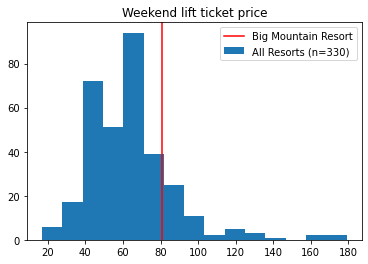

In [16]:
data_ski_3['AdultWeekend'].hist(bins = 15, grid = False, label = 'All Resorts (n=330)')
plt.axvline(x=81, color = 'red', label = 'Big Mountain Resort')
plt.title('Weekend lift ticket price')
plt.legend()
plt.savefig('figures/histweekend.tiff')

# Predict Weekday adult ticket using model 2 

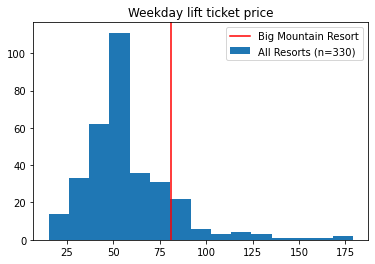

In [17]:
data_ski_3['AdultWeekday'].hist(bins = 15, grid = False, label = 'All Resorts (n=330)')
plt.axvline(x=81, color = 'red', label = 'Big Mountain Resort')
plt.title('Weekday lift ticket price')
plt.legend()
plt.savefig('figures/histweekday.tiff')

In [28]:
data_ski_3= pd.read_csv('C:\\Users\\gianl\\data\\step3_output_V2_outliners_included.csv')

x_wd = data_ski_3.drop(['Name','AdultWeekday', 'state', 'summit_elev'], axis =1)
y_wd = data_ski_3['AdultWeekday']
print(x_wd.columns)

#Scaling
sca_wd = StandardScaler().fit(x_wd)
x_wd_scaled = sca_wd.transform(x_wd)
y_wd = y_wd.ravel()

#Split train/test
x_wd_train, x_wd_test, y_wd_train, y_wd_test = train_test_split(x_wd_scaled, y_wd, test_size =0.25, random_state = 1)

#Linear regression fit
lm_wd = linear_model.LinearRegression()
lm_wd.fit(x_wd_train, y_wd_train)

#Predition of Weekday lift ticket 
y_wd_predict = lm_wd.predict(x_wd_test)
print('Model Mean Abs Error is', '{:.2f}'.format(mean_absolute_error(y_wd_predict, y_wd_test)))
print('Model Variance Explained Score is', '{:.2f}'.format(explained_variance_score(y_wd_predict, y_wd_test)))

#Importarting data Mountain Resort Data 
Big_Mountain = data_ski_3[data_ski_3['Name'].str.contains('Big Mountain')]

#Removing unimportant columns
Big_Mountain_x = Big_Mountain.drop(['Name','AdultWeekday', 'state', 'summit_elev'], axis =1)

#Extracting y(current ticket price)
Big_Mountain_y = Big_Mountain['AdultWeekday'].ravel()
#Scaling features for Mountain Resort Data 
Big_Mountain_x_scaled = sca_wd.transform(Big_Mountain_x)

#Predicting weekday ticket price
Big_Mountain_Adult_Weekend_pred = lm_wd.predict(Big_Mountain_x_scaled)
#Predict weekday ticket price
#Printing current ticket price 
print('Prediction for weekday ticket is', '{:.2f}'.format(float(Big_Mountain_Adult_Weekend_pred)))
print('Weekday ticket is currently', float(Big_Mountain_y))



Index(['vertical_drop', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekend',
       'projectedDaysOpen', 'NightSkiing_ac', 'clusters'],
      dtype='object')
Model Mean Abs Error is 5.44
Model Variance Explained Score is 0.91
Prediction for weekday ticket is 75.93
Weekday ticket is currently 81.0


In [20]:
print(x_wd.columns)

Index(['vertical_drop', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekend',
       'projectedDaysOpen', 'NightSkiing_ac', 'clusters'],
      dtype='object')


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

Text(0.5, 1.0, 'summit_elev by vertical_drop by cluster')

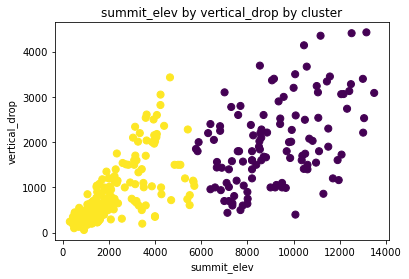

In [21]:
plt.scatter(data_ski_3['summit_elev'], data_ski_3['vertical_drop'], c=data_ski_3['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(data_ski['summit_elev'], data_ski['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
#plt.savefig('figures/fig1.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [22]:
#import pickle
#s = pickle.dumps(lm2)
from joblib import dump, load
dump(lm2, 'C:/Users/gianl/models/regression_model.pkl') 

['C:/Users/gianl/models/regression_model.pkl']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [25]:
MAE = [5.12, 5.44, 11.11]
Var = [0.93, 0.91, 0.3]

indd = ['Adult Weekend Lift Ticket', 'Adult Weekday Lift Ticket', 'Projected Days Open' ]

results = pd.DataFrame({'Mean abs error': MAE, 'Explained Variance Score': Var}, index = indd)




In [26]:
results

,Mean abs error,Explained Variance Score
Adult Weekend Lift Ticket,5.12,0.93
Adult Weekday Lift Ticket,5.44,0.91
Projected Days Open,11.11,0.30


In [27]:
results.to_csv('C:\\Users\\gianl\\data\\Result_table.csv', index = False)